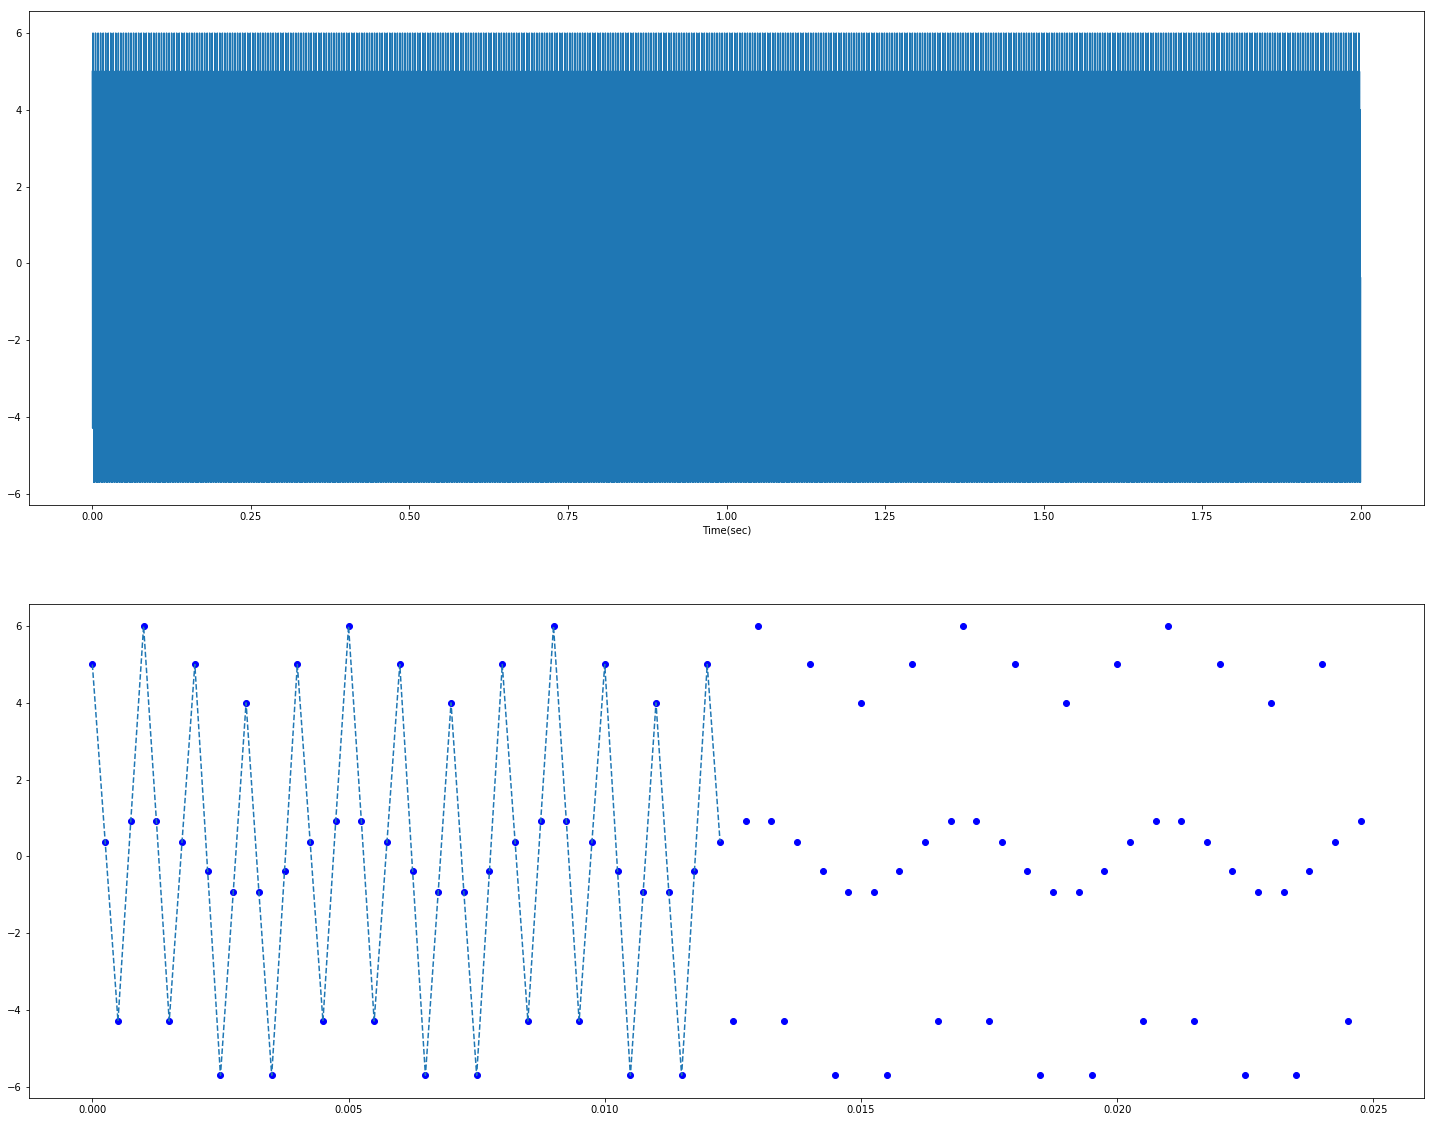

In [39]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import wave
import math
import scipy.fftpack
import librosa
import librosa.display
from scipy import signal
from scipy.io import wavfile

# 1/8 ===GENERATE A TIME-DOMAIN DISCRETE SIGNAL=== #
fs = 4000                      # sampling frequency should be 2x greater than signal's. 
t = np.arange(0, 2.0, 1.0/fs)  # 2-sec-long interval, devided into 8000 pieces

fc_1 = 250   # 250Hz
fc_2 = 1000  # 1000Hz
x = np.sin(2*np.pi*fc_1*t) + 5*np.cos(2*np.pi*fc_2*t)  # Two evenly sampled sine waves

plt.figure(figsize=(25,20))
plt.subplot(2,1,1)
plt.plot(t,x)
plt.xlabel("Time(sec)")
plt.subplot(2,1,2)
plt.plot(t[0:100], x[0:100],'bo')
plt.plot(t[0:50], x[0:50], '--')
plt.show()

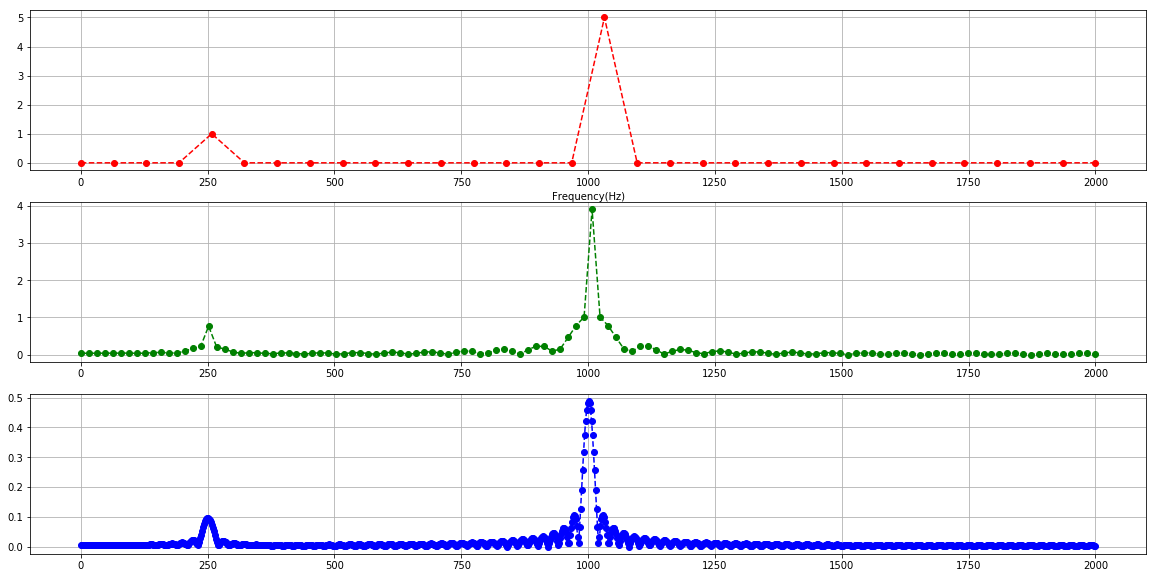

In [40]:
# 2/8 ===FREQUENCY-DOMAIN ANALYSIS - FFT === #
fft_input = x[0:200]        # not necessary to pass whole signal as FFT input

  # should be in power of 2
n_fft_64 = 64               
n_fft_256 = 256
n_fft_2048 = 2048

fft_output_64 = scipy.fftpack.fft(fft_input,n_fft_64)
fft_output_256 = scipy.fftpack.fft(fft_input,n_fft_256)
fft_output_2048 = scipy.fftpack.fft(fft_input,n_fft_2048)

  # single-sided spectrum (no imaginary/minus frequency)
fft_output_64 = 2.0/n_fft_64 * np.abs(fft_output_64[:n_fft_64//2])  
fft_output_256 = 2.0/n_fft_256 * np.abs(fft_output_256[:n_fft_256//2])
fft_output_2048 = 2.0/n_fft_2048 * np.abs(fft_output_2048[:n_fft_2048//2])

  # devided into n_fft bins
freq_64 = np.linspace(0.0, fs/2, n_fft_64//2) 
freq_256 = np.linspace(0.0, fs/2, n_fft_256//2)
freq_2048 = np.linspace(0.0, fs/2, n_fft_2048//2)

  # visualize
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.xlabel('Frequency(Hz)')
plt.plot(freq_64,fft_output_64,'r--',marker='o')
plt.grid()
plt.subplot(3,1,2)
plt.plot(freq_256,fft_output_256,'g--',marker='o')
plt.grid()
plt.subplot(3,1,3)
plt.plot(freq_2048,fft_output_2048,'b--',marker='o')
plt.grid()
plt.show()

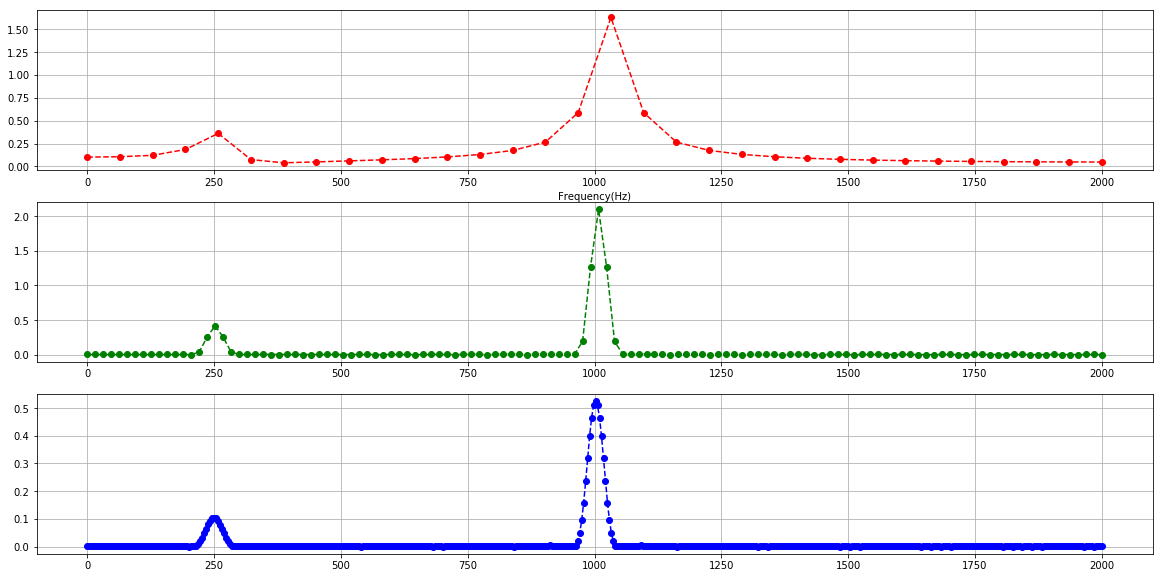

In [41]:
# 3/8 ===WINDOWED FFT === #
fft_input = fft_input * signal.hamming(len(fft_input))   # always window before zero-pad.

  # should be in power of 2
n_fft_64 = 64               
n_fft_256 = 256
n_fft_1024 = 1024

fft_output_64 = scipy.fftpack.fft(fft_input,n_fft_64)
fft_output_256 = scipy.fftpack.fft(fft_input,n_fft_256)
fft_output_1024 = scipy.fftpack.fft(fft_input,n_fft_1024)

  # single-sided spectrum (no imaginary number nor minus frequency)
fft_output_64 = 2.0/n_fft_64 * np.abs(fft_output_64[:n_fft_64//2])  
fft_output_256 = 2.0/n_fft_256 * np.abs(fft_output_256[:n_fft_256//2])
fft_output_1024 = 2.0/n_fft_1024 * np.abs(fft_output_1024[:n_fft_1024//2])

  # devided into n_fft bins
freq_64 = np.linspace(0.0, fs/2, n_fft_64//2) 
freq_256 = np.linspace(0.0, fs/2, n_fft_256//2)
freq_1024 = np.linspace(0.0, fs/2, n_fft_1024//2)

  # visualize
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.xlabel('Frequency(Hz)')
plt.plot(freq_64,fft_output_64,'r--',marker='o')
plt.grid()
plt.subplot(3,1,2)
plt.plot(freq_256,fft_output_256,'g--',marker='o')
plt.grid()
plt.subplot(3,1,3)
plt.plot(freq_1024,fft_output_1024,'b--',marker='o')
plt.grid()
plt.show()

2048


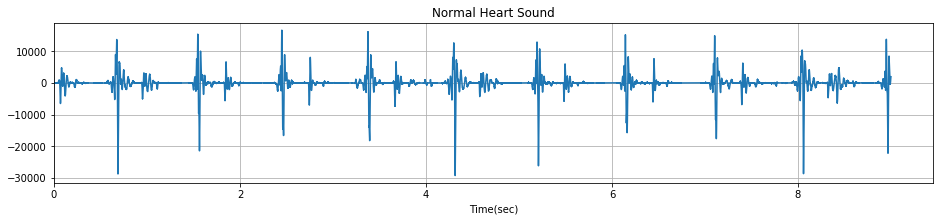

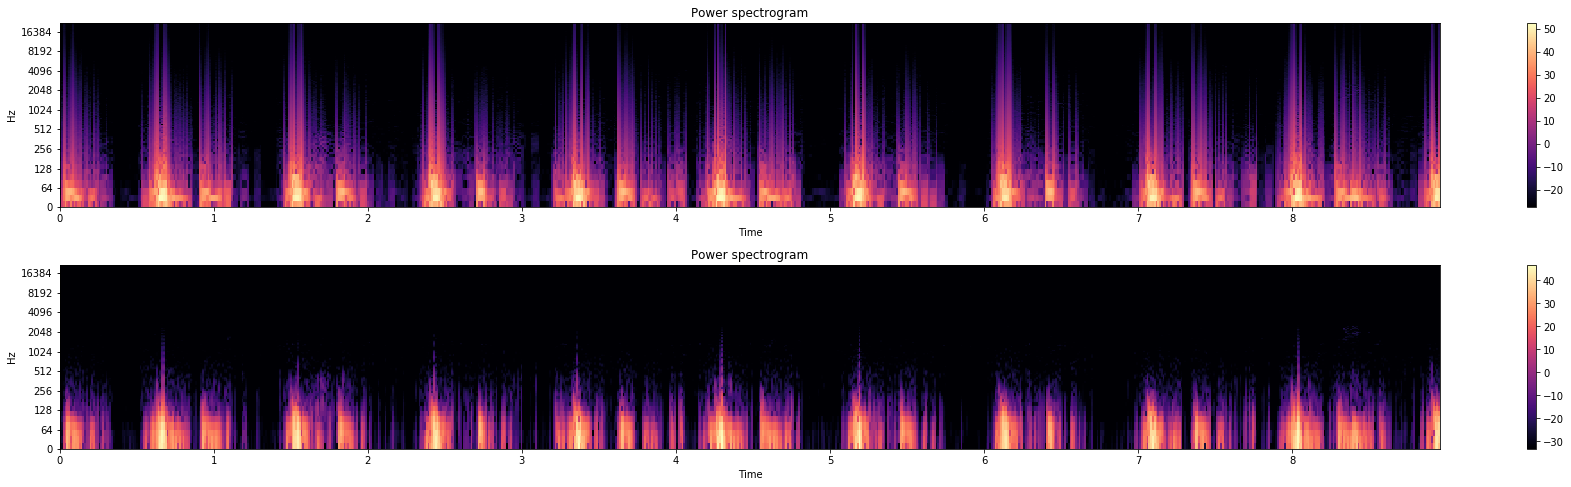

In [42]:
# 4/8 ===STFT SPECTROGRAM=== #
filepath = './normal_201103101140.wav'
fs, samples = wavfile.read(filepath)
stft_input,sr = librosa.load(filepath, sr=None)

window = signal.kaiser(2048, beta=1)
window_narrow = signal.kaiser(2048, beta=21)   

stft_output = librosa.stft(stft_input, window=window,center=False)
stft_output_narrow = librosa.stft(stft_input, window=window_narrow,center=False)  #narrower window

print(len(window_narrow))

  # visualize
plt.figure(figsize=(15.75,10))
plt.subplot(3,1,1)
plt.title('Normal Heart Sound')
plt.xlabel('Time(sec)')
plt.plot(np.linspace(0, len(samples)//fs,len(samples)), samples)
plt.xlim(xmin=0)
plt.grid()
plt.figure(figsize=(25,10))
plt.subplot(3,1,2)
librosa.display.specshow(librosa.amplitude_to_db(stft_output, ref=1), y_axis='log', x_axis='time',sr=sr)
plt.title('Power spectrogram')
plt.colorbar()
plt.subplot(3,1,3)
librosa.display.specshow(librosa.amplitude_to_db(stft_output_narrow, ref=1), y_axis='log', x_axis='time',sr=sr)
plt.title('Power spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


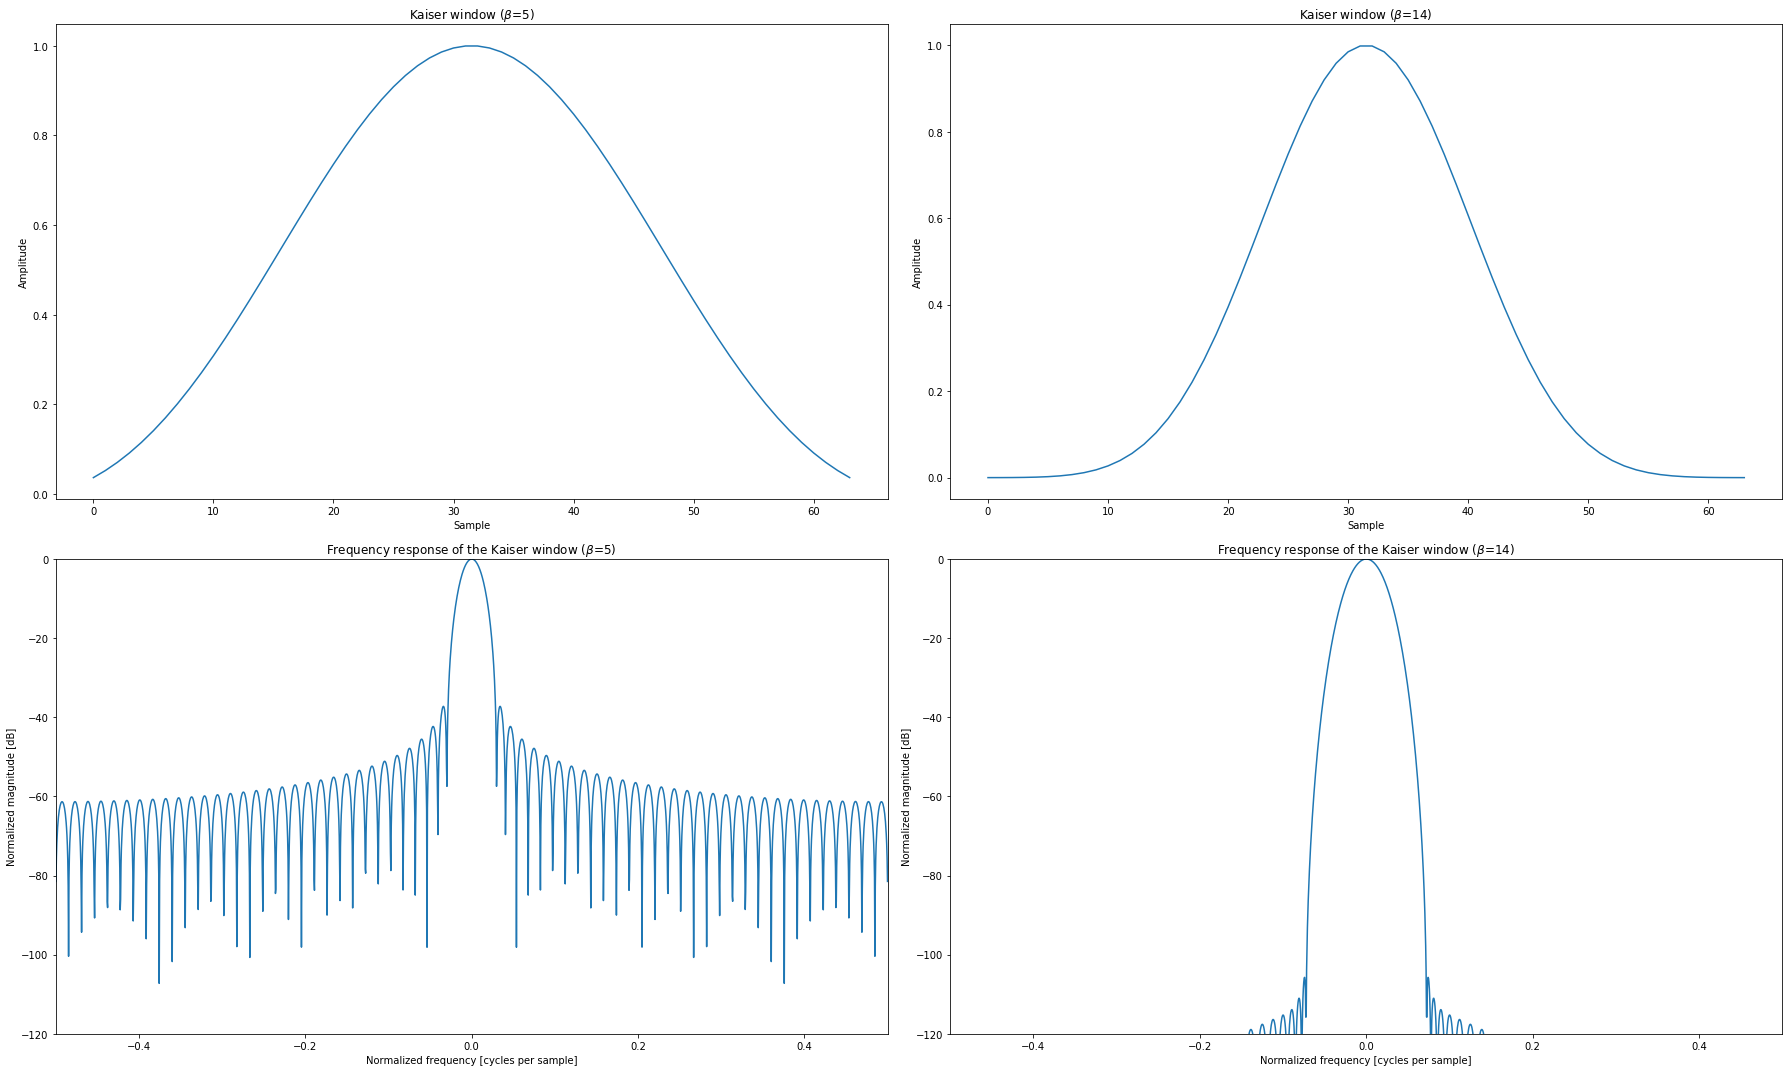

In [43]:
# 5/8 ===LEARN MORE ABOUT WINDOW=== #
window = signal.kaiser(64, beta=5)
window_narrow = signal.kaiser(64, beta=14)

  # visualize
plt.figure(figsize=(25,15))
gs = gridspec.GridSpec(2, 2)
plt.subplot(gs[0, 0])
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=5)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(gs[1, 0])
A = scipy.fftpack.fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(scipy.fftpack.fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=5)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

plt.subplot(gs[0, 1])
plt.plot(window_narrow)
plt.title(r"Kaiser window ($\beta$=14)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(gs[1, 1])
A = scipy.fftpack.fft(window_narrow, 2048) / (len(window_narrow)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(scipy.fftpack.fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=14)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.tight_layout()
plt.show()

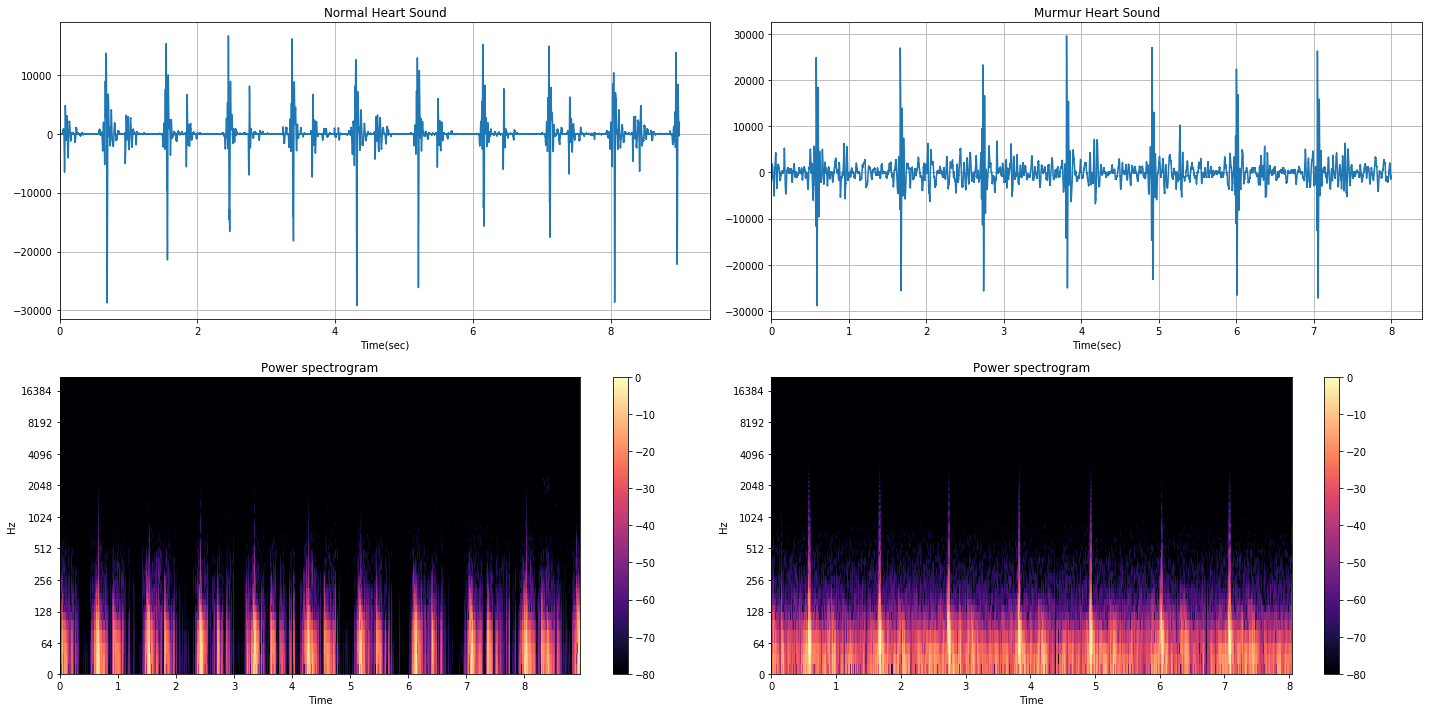

In [44]:
# 6/8 ===NORMAL V.S. MURMUR === #
filepath = './murmur_201101180902.wav'
fs, samples_murmur = wavfile.read(filepath)

window_narrow = signal.kaiser(2048, beta=14)
stft_input_murmur,sr = librosa.load(filepath, sr=None)
stft_output_murmur = librosa.stft(stft_input_murmur,window=window_narrow)  # both use narrow window
  
    # visualize
plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2, 2)
plt.subplot(gs[0, 0])
plt.title('Normal Heart Sound')
plt.xlabel('Time(sec)')
plt.plot(np.linspace(0.0, len(samples)//fs,len(samples)), samples)
plt.xlim(xmin=0)
plt.grid()

plt.subplot(gs[0, 1])
plt.title('Murmur Heart Sound')
plt.xlabel('Time(sec)')
plt.plot(np.linspace(0.0, len(samples_murmur)//fs,len(samples_murmur)), samples_murmur)
plt.xlim(xmin=0)
plt.grid()

plt.subplot(gs[1, 0])
librosa.display.specshow(librosa.amplitude_to_db(stft_output_narrow, ref=np.max), y_axis='log', x_axis='time',sr=sr)
plt.title('Power spectrogram')
plt.colorbar()

plt.subplot(gs[1, 1])
librosa.display.specshow(librosa.amplitude_to_db(stft_output_murmur, ref=np.max), y_axis='log', x_axis='time',sr=sr)
plt.title('Power spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()

ContinuousWavelet mexh
  Family name:    Mexican hat wavelet
  Short name:     mexh
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False


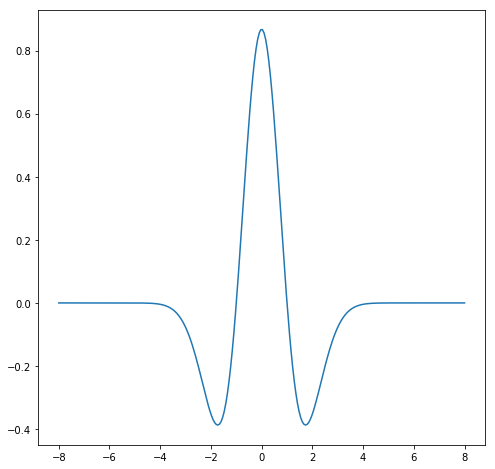

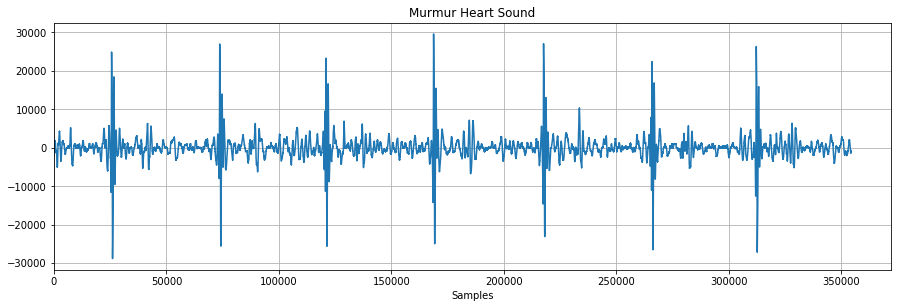

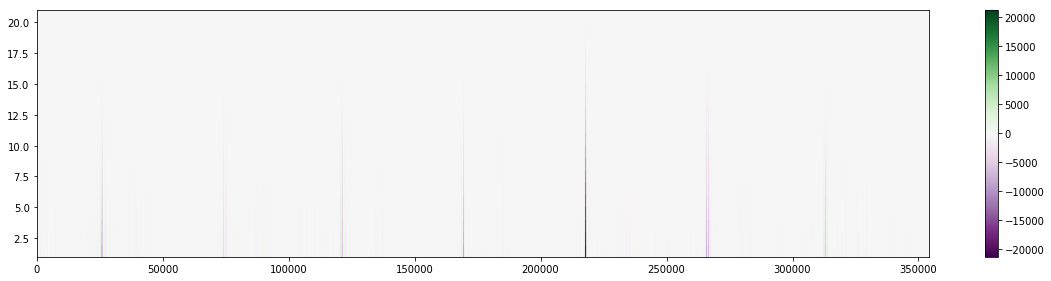

In [45]:
# 7/8 ===CONTINUOUS WAVELET TRANSFORM=== #
import pywt

continuous_wavelet = pywt.ContinuousWavelet('mexh')  # continuous wavelet object
print(continuous_wavelet)

max_scale = 20
scales = np.arange(1, max_scale + 1)
cwtmatr, freqs = pywt.cwt(samples_murmur, scales, continuous_wavelet, 44100)

  # visualize
plt.figure(figsize=(8,8))
(phi, psi) = continuous_wavelet.wavefun()
plt.plot(psi,phi)
plt.show()
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title('Murmur Heart Sound')
plt.xlabel('Samples')
plt.plot(np.linspace(0.0, len(samples_murmur),len(samples_murmur)), samples_murmur)
plt.xlim(xmin=0)
plt.grid()

plt.figure(figsize=(20,10))
plt.subplot(2,1,2)
plt.imshow(cwtmatr, extent=[0, int(len(samples_murmur)), 1, max_scale + 1],cmap='PRGn', aspect='auto', 
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar()

plt.show() 

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
MAXIMUM DECOMPOSE LEVEL =  16
177160 88581 44292 44292
354318 177160 88582 88582


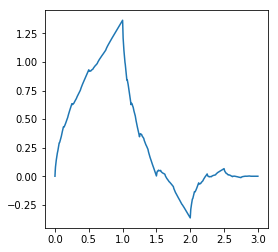

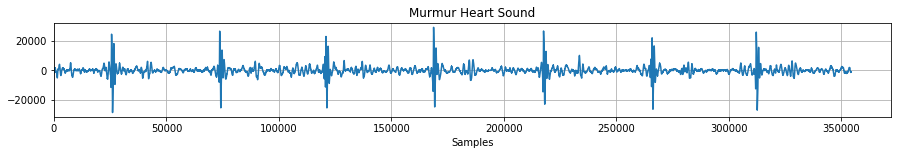

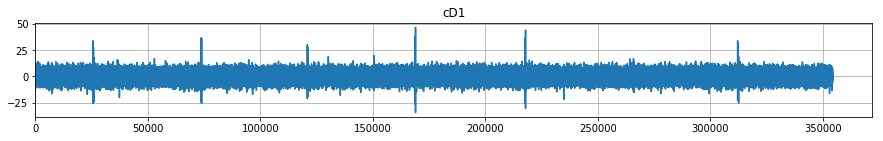

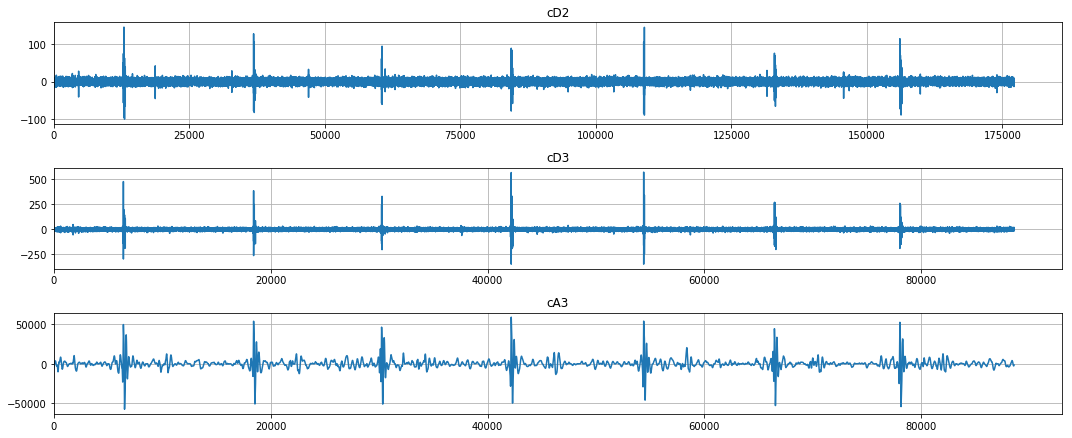

In [60]:
# 8/8 ===DISCRETE WAVELET TRANSFORM=== #
discrete_wavelet = pywt.Wavelet('db2')  # discrete wavelet object
print(discrete_wavelet)

max_level = pywt.dwt_max_level(len(samples_murmur), discrete_wavelet)
print('MAXIMUM DECOMPOSE LEVEL = ',max_level)

  # decompose
tree = pywt.wavedec(samples_murmur, 'db2',level=3)
cA3, cD3, cD2, cD1 = tree
print(len(cD1),len(cD2),len(cD3),len(cA3))

  # reconstruct
rec_sample = pywt.waverec(tree, 'db2')
rec_to_orig = pywt.idwt(None, cD1, 'db2', 'smooth')  # 
rec_to_level1 = pywt.idwt(None, cD2, 'db2', 'smooth')
rec_to_level2_from_detail = pywt.idwt(None, cD3, 'db2', 'smooth')
rec_to_level2_from_approx = pywt.idwt(cA3, None, 'db2', 'smooth')
print(len(rec_cD1),len(rec_cD2),len(rec_cD3),len(rec_cA3))

  # visualize
plt.figure(figsize=(4,4))
(phi, psi, x) = discrete_wavelet.wavefun()
plt.plot(x, phi)
plt.show()
plt.figure(figsize=(15,10))
plt.subplot(5,1,1)
plt.title('Murmur Heart Sound')
plt.xlabel('Samples')
plt.plot(np.linspace(0.0, len(samples_murmur),len(samples_murmur)), samples_murmur)
plt.xlim(xmin=0)
plt.grid()

plt.figure(figsize=(15,10))
plt.subplot(5,1,2)
plt.title('cD1')
plt.plot(np.linspace(0.0, len(rec_to_orig),len(rec_to_orig)), rec_to_orig)
plt.xlim(xmin=0)
plt.grid()
plt.figure(figsize=(15,10))
plt.subplot(5,1,3)
plt.title('cD2')
plt.plot(np.linspace(0.0, len(rec_to_level1),len(rec_to_level1)), rec_to_level1)
plt.xlim(xmin=0)
plt.grid()
plt.subplot(5,1,4)
plt.title('cD3')
plt.plot(np.linspace(0.0, len(rec_to_level2_from_detail),len(rec_to_level2_from_detail)), rec_to_level2_from_detail)
plt.xlim(xmin=0)
plt.grid()
plt.subplot(5,1,5)
plt.title('cA3')
plt.plot(np.linspace(0.0, len(rec_to_level2_from_approx),len(rec_to_level2_from_approx)), rec_to_level2_from_approx)
plt.xlim(xmin=0)
plt.grid()
plt.tight_layout()
plt.show() 